In [133]:
import tushare as ts
import matplotlib.pyplot as plt
import matplotlib.finance as mpf
import numpy as np
import talib as talib
import pandas as pd
import datetime as dt

#取所有2n天内的低点
def get_low_point(df,columns,n):
    conds = (df[columns]==df[columns])
    for i in range(0,n):
        conds = conds & (df[columns].shift(i+1)>=df[columns]) &  (df[columns].shift(-i-1)>=df[columns])  
    return df[conds] 

#取所有2n天内的高点
def get_high_point(df,columns,n):
    conds = (df[columns]==df[columns])
    for i in range(0,n):
        conds = conds & (df[columns].shift(i+1)<=df[columns]) &  (df[columns].shift(-i-1)<=df[columns])  
    return df[conds]

data = ts.get_k_data('002023', ktype='w',autype="qfq",index=False,start='2001-01-01', end='2018-05-15')
#RSI
data["rsi"] = talib.RSI(data['close'].values, timeperiod=9)

In [160]:
#取底背离点
def get_low_beili(df,columns1, columns2):
    return df[ (df[columns1].shift(1)>df[columns1]) & (df[columns2].shift(1)<df[columns2])  ]

def get_high_beili(df,columns1, columns2):
    return df[ (df[columns1].shift(1)<df[columns1]) & (df[columns2].shift(1)>df[columns2])  ]

k_LowPoint= get_low_point(data,"low",2).dropna()
k_LowPoint= get_low_point(k_LowPoint,"low",1).dropna()
low_dest = get_low_beili(k_LowPoint,"low","rsi")

low_dest


,date,open,close,high,low,volume,code,rsi
77,2006-03-10,1.695,1.615,1.695,1.563,50039.67,002023,37.299675
419,2012-12-07,4.002,4.089,4.162,3.744,170388.00,002023,44.954196
684,2018-02-02,9.930,8.890,9.980,7.700,647666.00,002023,30.499661


In [158]:
k_heightPoint= get_high_point(data,"high",2).dropna()
k_heightPoint= get_high_point(k_heightPoint,"high",1).dropna()
high_dest = get_high_beili(k_heightPoint,"high","rsi")
high_dest

,date,open,close,high,low,volume,code,rsi
138,2007-06-01,3.996,3.417,4.300,3.417,205270.68,002023,59.116242
284,2010-04-16,7.089,7.424,7.735,7.079,125398.18,002023,70.396022
306,2010-09-17,8.476,8.103,8.860,7.787,288213.00,002023,67.495984
314,2010-11-12,9.123,8.831,9.951,8.668,602638.00,002023,64.460076
469,2013-11-29,8.853,9.279,9.407,8.245,434992.00,002023,74.242311
481,2014-02-21,8.917,8.701,9.539,8.608,400827.00,002023,60.963238


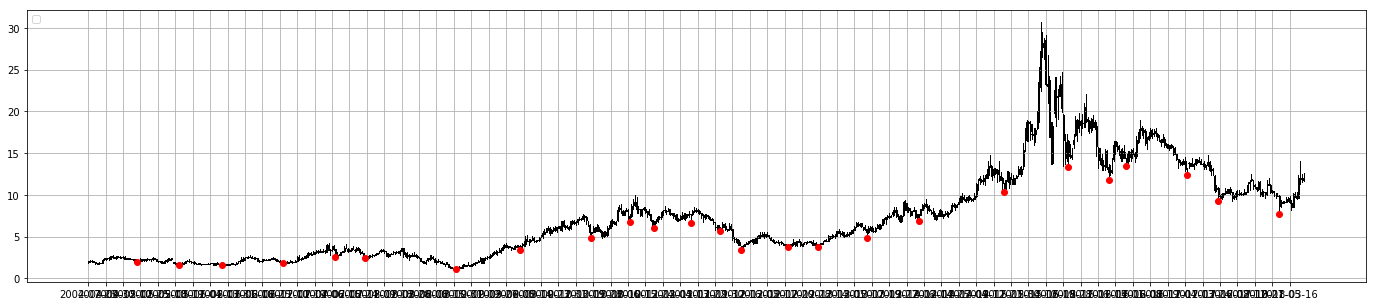

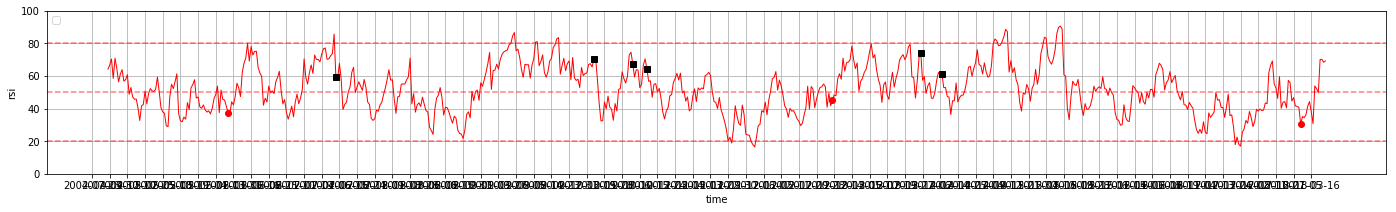

In [159]:
 #绘制K线图
 
fig = plt.figure(figsize=(24, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xticks(range(0, len(data['date']), 10))
ax.set_xticklabels(data['date'][::10])
ax.legend(loc='upper left')

mpf.candlestick2_ochl(ax, data['open'], data['close'], data['high'], data['low'],width=0.5, colorup='r', colordown='green',alpha=0.6)
plt.grid()
#画出低点
plt.plot(k_LowPoint.index, k_LowPoint["low"],'o',color='red')

#绘制RSI线图
fig2 = plt.figure(figsize=(24,3)) 
ax2 = fig2.add_subplot(1, 1, 1)
#设置坐标轴范围
plt.xlabel('time')
plt.ylabel('rsi')
ax2.set_xticks(range(0, len(data['date']), 10))
ax2.set_xticklabels(data['date'][::10]) 
ax2.legend(loc='upper left')
#设置坐标轴范围
#plt.xlim((-5, 5))
plt.ylim((0, 100))
plt.grid()
plt.plot(data["date"],data["rsi"],color='red', linewidth=1.0, linestyle='-')
plt.axhline(80,alpha=0.5,color='red',linestyle='--') 
plt.axhline(50,alpha=0.5,color='red',linestyle='--') 
plt.axhline(20,alpha=0.5,color='red',linestyle='--') 

#画出底背离低点
plt.plot(low_dest.index, low_dest["rsi"],'o',color='red') 
#plt.arrow(0, 0,  50,  50, head_width=0.5, head_length=0.1, fc='k', ec='k')

#画出顶背离低点
plt.plot(high_dest.index, high_dest["rsi"],'s',color='black') 